# Assignment 2 - Machine Learning Basics

## *Juli You*
Netid:  *jy243*

Github link: *https://github.com/you-juli/machine-learning-course*

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**
1. A flexible method will be better than an inflexible method. Because the sample size is extremely large, we have lower risk of overfitting, which is the main problem of flexible methods. A flexible method also has lower bias.
<br>

2. A flexible method will be worse than an inflexible method. The sample size is small, so a flexible method can easily cause overfitting, whereas an flexible method can effectively reduce the risk of overfitting.
<br>

3. A flexible method will be better than an inflexible method. Flexible methods are not effective to find highly non-linear relationships, but inflexible methods have the capabilities to pick up non-linear relationships.
<br>

4. A flexible method will be worse than an inflexible method. The high variance of the error terms means there are a lot of noises in the data. If we use flexible method, we might overfit these noises. 

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**
<br>
(a). It is a regression problem because the salary of CEOs is a continuous variable. We are interested in inference since we want to understand how each factor affects the salary. The sample size is 500 as the dataset contains top 500 firms. The number of predictors is 3, which are profit, number of employees, and industry.
<br>

(b). It is a classification problem because the outcome variable is categorical, either a success or a failure. We are interested in prediction because we want to know if the new product will be a success or a failure. The sample size is 20 as the dataset contains 20 products. The number of predictors is 13, which are price charged for the product, marketing budget, competition price, and 10 other variables.
<br>

(c). It is regression problem because the % change in US dollar in relatino to weekly change in stock markets is a continous variable. It is a prediction problem since "we are interesting in predicting the % change". The sample size is 52 as there are 52 weeks in 2012. The number of predictors is 3, which are % change in the US market, % change in the British market, and % change in the German market.

# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

In [179]:
# (a) Write your own kNN classifier
class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        self.x = 0
        self.y = 0
        
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.x = x
        self.y = y
        
    def predict(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        # Calculate the distance from each vector in x to the training data
        #for i in range(x.shape[0]):
        for i in x:
            dist_list = []
            for j in self.x:
                dist = np.sqrt(np.sum((i-j)**2))
                dist_list.append(dist)
                
            dist_k = sorted(zip(dist_list, self.y), key = lambda x: x[0])[:k]
            
            classes=[]
            for n in dist_k:
                class1 = n[1]
                classes.append(class1)
            if classes.count(1) > classes.count(0):
                y_hat_i = 1
            else:
                y_hat_i=0
            y_hat.append(y_hat_i)     
        
        # Return the estimated targets
        #return y_hat
        return y_hat
    

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

In [208]:
#(b) Load data
import pandas as pd
x_test_low = np.loadtxt("A2_X_test_low.csv", delimiter=',')
x_train_low = np.loadtxt("A2_X_train_low.csv", delimiter=',')
y_test_low = np.loadtxt("A2_y_test_low.csv", delimiter=',')
y_train_low = np.loadtxt("A2_y_train_low.csv", delimiter=',')
x_test_high = np.loadtxt("A2_X_test_high.csv", delimiter=',')
x_train_high = np.loadtxt("A2_X_train_high.csv", delimiter=',')
y_test_high = np.loadtxt("A2_y_test_high.csv", delimiter=',')
y_train_high = np.loadtxt("A2_y_train_high.csv", delimiter=',')

In [213]:
#(c)
# Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset 
#   and time the predictions of each

import time
k = 5
start_low = time.time()
knn_low = Knn()
knn_low.fit(x_train_low, y_train_low)
y_low = knn_low.predict(x_test_low, k)
end_low = time.time()
duration_low = end_low - start_low
accuracy_low = accuracy(np.array(y_test_low), np.array(y_low))
print("Low dimension dataset:")
print("Prediction accuracy for manual KNN function: %.4f" % (accuracy_low))
print("Time consumed for manual KNN function: %.4f seconds"% (duration_low))

start_high = time.time()
knn_high = Knn()
knn_high.fit(x_train_high, y_train_high)
y_high = knn_high.predict(x_test_high, k)
end_high = time.time()
duration_high = end_high - start_high
accuracy_high = accuracy(np.array(y_test_high), np.array(y_high))
print("High dimension dataset:")
print("Prediction accuracy for manual KNN function: %.4f" % (accuracy_high))
print("Time consumed for manual KNN function: %.4f seconds" % (duration_high))


Low dimension dataset:
Prediction accuracy for manual KNN function: 0.9250
Time consumed for manual KNN function: 6.2847 seconds
High dimension dataset:
Prediction accuracy for manual KNN function: 0.9930
Time consumed for manual KNN function: 6.5076 seconds


In [214]:
#(d) Comparison between manual KNN function and sklearn KNN function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
start_low_sk = time.time()
lowClassifier = KNeighborsClassifier(n_neighbors = k)
lowClassifier.fit(x_train_low, y_train_low)
y_low_sk = lowClassifier.predict(x_test_low)
end_low_sk = time.time()
duration_low_sk = end_low_sk - start_low_sk
accuracy_low_sk = accuracy_score(y_low_sk, y_train_low)
print("Low dimension dataset:")
print("Prediction accuracy for Knn by sklearn: %.4f" % accuracy_low_sk)
print("Time consumed for manual KNN function: %.4f seconds" % duration_low_sk)


start_high_sk = time.time()
highClassifier = KNeighborsClassifier(n_neighbors = k)
highClassifier.fit(x_train_high, y_train_high)
y_high_sk = highClassifier.predict(x_test_high)
end_high_sk = time.time()
duration_high_sk = end_high_sk - start_high_sk
accuracy_high_sk = accuracy_score(y_high_sk, y_train_high)
print("High dimension dataset:")
print("Prediction accuracy for Knn by sklearn: %.4f" % accuracy_high_sk)
print("Time consumed for manual KNN function: %.4f seconds" % duration_high_sk)


Low dimension dataset:
Prediction accuracy for Knn by sklearn: 0.9250
Time consumed for manual KNN function: 0.0241 seconds
High dimension dataset:
Prediction accuracy for Knn by sklearn: 0.9930
Time consumed for manual KNN function: 0.1576 seconds


(d) From the comparison above, we can see sklearn is much faster than our own-defined classifier, but our own classifier has the same prediction accuracy as sklearn on low dimension dataset (0.925) and high dimension dataset (0.993).
<br>

(e) Nowadays, there is increasing demand for machine learning algorithms to calculate and perform prediction real time, which allows algorithm to take into account the new information and come up with new response immediately. If the prediction process is slow, it is not capable to perform real-time computing. 

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [4]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

**ANSWER**:

In [5]:
#(a)
import pandas as pd
dist_list = []
test_data = np.array([0,0,0])
for i in range(X.shape[0]):
    sum_sqr = 0
    for j in range(X.shape[1]):
        sum_sqr += (X[i][j]- test_data[j])**2
    dis = sum_sqr**0.5
    dist_list.append(dis)
    d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data = {"Obs":[1,2,3,4,5,6],"Distance":dist_list})
df.set_index('Obs', inplace=True)
df.columns.name = df.index.name
df.index.name = None
df

Obs,Distance
1,3.000000
2,2.000000
3,3.162278
4,2.236068
5,1.414214
6,1.732051


In [6]:
#(b)
min_dist_index = dist_list.index(min(dist_list))
color = y[min_dist_index]
print("Prediction with K = 1 is %s." % (color))

Prediction with K = 1 is b.


(b) When K = 1, our prediction is blue. Out of the six observations, the fifth one has the shortest distance to the test point and the fifth observation is blue. Therefore, our prediction is blue.

In [7]:
#(c)
from statistics import mode
sorted_list = sorted(dist_list)
#min_3_list_index = dist_list.index(sorted_list[0:2])
#min_3_list_index
sorted_list[0:3]
index=[dist_list.index(i) for i in sorted_list[0:3]]
color = mode(y[index])
print("Prediction with K = 3 is %s." % (color))


Prediction with K = 3 is r.


(c) When K = 3, our prediction is red. We are looking at the top three observations after we sort them by distance from low to high. Out of the three observations, two are red and one is blue. Red is the most frequent color among the three observations. Therefore, our prediction is red.

(d)
If the Bayes decision boundary is highly nonlinear, we expect K to be small so that there is less bias and more flexibility. The lower K is, the less smooth and the less linear-like the boundary will be.

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

In [182]:
#（a)
from sklearn.datasets import make_moons
x, y = make_moons(n_samples = 1000, noise = 0.35,random_state = 600)

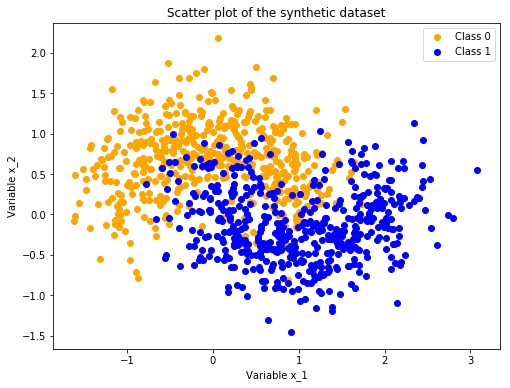

In [217]:
#(b) 
plt.figure(figsize = (8,6))
import matplotlib.pyplot as plt
plt.scatter(x[y==0][:,0],x[y==0][:,1],c="orange",label="Class 0")
plt.scatter(x[y==1][:,0],x[y==1][:,1],c="blue",label="Class 1")
plt.xlabel("Variable x_1")
plt.ylabel("Variable x_2")
plt.title("Scatter plot of the synthetic dataset")
plt.legend()
plt.show()

In [218]:
#(c)
import random
from sklearn.neighbors import KNeighborsClassifier
df_x = pd.DataFrame(x, columns = ["x1","x2"])
df_y = pd.DataFrame(y, columns = ["y"])
df = pd.concat([df_x, df_y], axis = 1)
sample1 = df.sample(n = 100)
sample2 = df.sample(n = 100)
sample3 = df.sample(n = 100)
sample_list = [sample1, sample2, sample3]
K_list = [1, 25, 50]
       
knn_list = []
for i in sample_list:
    for j in K_list:
        knn_j = KNeighborsClassifier(n_neighbors = j)
        knn_fit = knn_j.fit(i[["x1","x2"]],i["y"])
        knn_list.append(knn_fit)

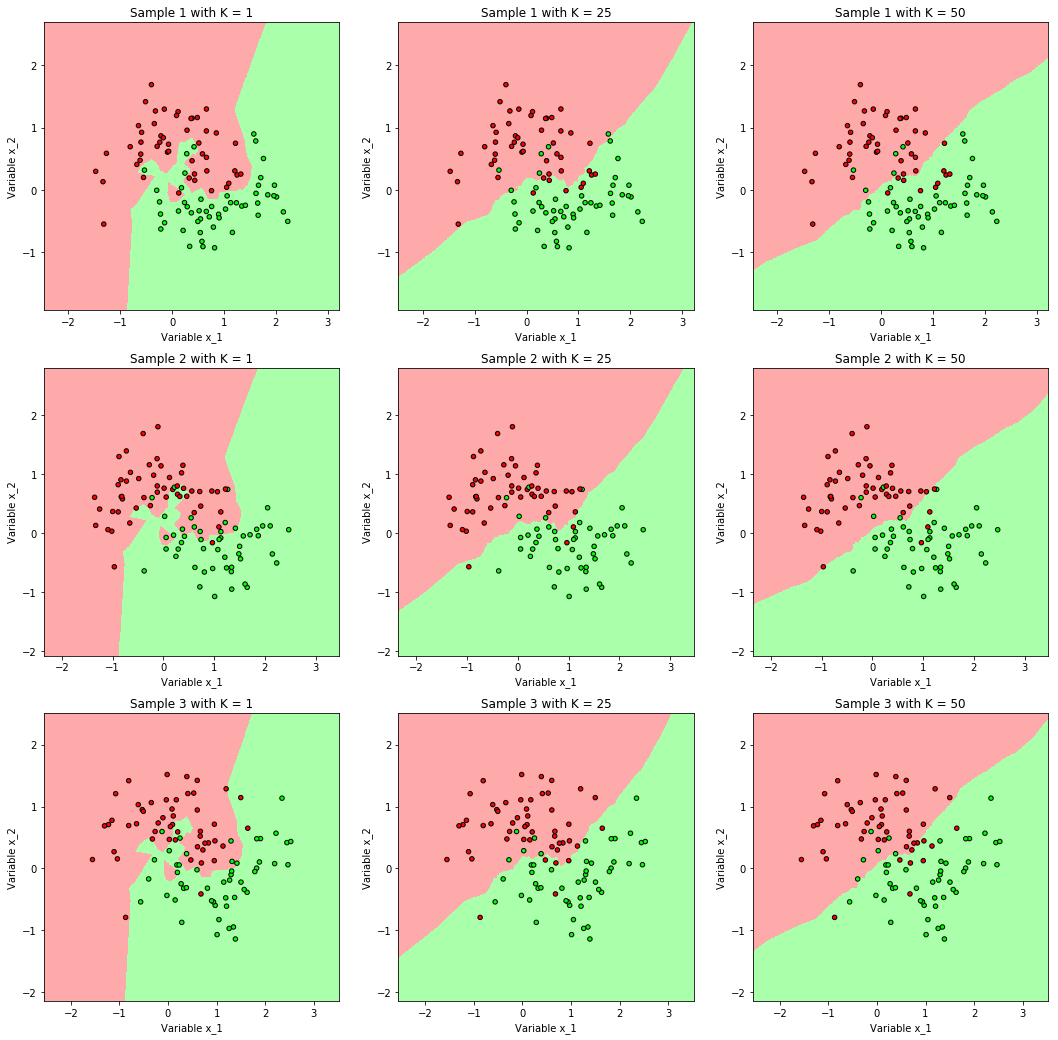

In [251]:
#(d)
from matplotlib.colors import ListedColormap
import matplotlib

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

fit, axes = plt.subplots(3, 3, figsize = (18,18))
for i in range(len(sample_list)):
    for j in range(len(K_list)): 
        x1_min, x1_max = sample_list[i]["x1"].min() - 1, sample_list[i]["x1"].max() + 1
        x2_min, x2_max = sample_list[i]["x2"].min() - 1, sample_list[i]["x2"].max() + 1
        h = 0.01
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
        Z = knn_list[j].predict(np.c_[xx1.ravel(), xx2.ravel()])
        Z = Z.reshape(xx1.shape)
        axes[i,j].pcolormesh(xx1, xx2, Z, cmap=cmap_light)
        axes[i,j].scatter(sample_list[i]["x1"],sample_list[i]["x2"],c=sample_list[i]["y"],
                          cmap=cmap_bold,edgecolor='k', s=20)
        axes[i,j].set_title("Sample %i with K = %i" % (i+1,K_list[j]))
        axes[i,j].set_xlabel("Variable x_1")
        axes[i,j].set_ylabel("Variable x_2")
        


(e)
<br>
Across the three samples, the decision boundries separate the data more accurately when K = 1 and less accurately when K = 50. The decision boundries change the most as sample data change when K = 1. In this case, when K = 25, the decision boundrie appears to be the best.
<br>
(f)
<br>
The higher K is, the higher bias and the lower variance the model has. It is more likely to underfit. We can see from the graphs that when K = 50, the decision boundries consistently predict the classification incorrectly. It is the error from poor model assumptions. 
<br>
The lower K is, the lower bias and the higher variance the model has. It is more likely to overfit. As shown in the graphs, although the decision boundries separate the data very accurately when K = 1, the boundries are sensitive to small data changes. The high variance can lead to overfit.

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

In [226]:
#(a)
#Call previously generated dataset training set
x_train, y_train = x, y
#Generate 1000 random sample as testing set
x_test, y_test = make_moons(n_samples = 1000, noise = 0.35,random_state = 500)

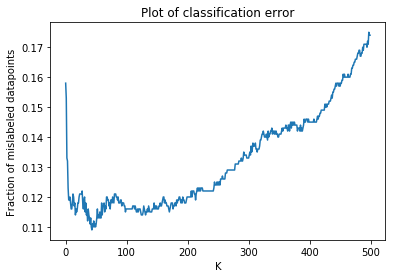

In [227]:
#(b)
from sklearn.metrics import accuracy_score
error = []
for k in range(1,501):
    knn_k = KNeighborsClassifier(n_neighbors= k)
    fit = knn_k.fit(x_train,y_train)
    predict = fit.predict(x_test)
    error1 = 1-accuracy_score(y_test,predict)
    error.append(error1)
plt.plot(error)
plt.title("Plot of classification error")
plt.ylabel("Fraction of mislabeled datapoints")
plt.xlabel("K")
plt.show()    

(c) The error rate is high when k is extreme small. As k increases, the error rate drops. After it hits the minimum, it starts increasing again. 
<br>

(d) The larger K is, the higher bias is and the lower variance is. In this case, the bias is the highest when k is 500 and the variance is the highest when k is 1.

In [228]:
min_error = min(error)
min_k = np.where(error == min(error))
print("The error rate reaches to the minimum %.2f when k = %d." % (min_error, min_k[0]))

The error rate reaches to the minimum 0.11 when k = 43.


(e) As we can see from the code above, the optimal k is 43, because at this point, we achieve the minimum error rate of 0.11. Also, k of 43 allows the model to reach a great balance between variance and bias and achieve the best prediction accuracy. 
<br>

(f) In other models such as regression, the flexibility of them is controlled by the number of coefficients. The more cooefficients the model has, the more flexible it is. 

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

In [233]:
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

**ANSWER**

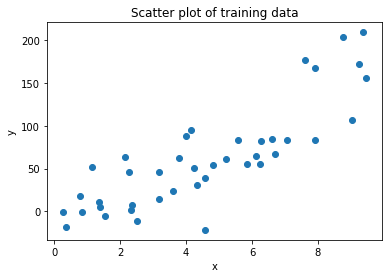

In [234]:
#(a)
plt.scatter(x_train, y_train)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of training data")
plt.show()

In [235]:
#(b)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linreg = LinearRegression()
linreg.fit(np.array(x_train).reshape(-1,1), np.array(y_train).reshape(-1,1))
intercept = linreg.intercept_
coefficient = linreg.coef_
print("The linear regression model is y = %f+%fx." % (intercept,coefficient))
r2 = linreg.score(np.array(x_train).reshape(-1,1), np.array(y_train).reshape(-1,1))
print("R-sqaured based on training data is %f." % (r2))
predict = linreg.predict(np.array(x_train).reshape(-1,1))
mse = mean_squared_error(predict, np.array(y_train).reshape(-1,1))
print("Mean Square Error based on training data is %f." % (mse))


The linear regression model is y = -21.730783+18.303207x.
R-sqaured based on training data is 0.701459.
Mean Square Error based on training data is 1052.585366.


In [236]:
#(c)
import math
x_train_log = [math.log(x) for x in x_train]
x_train_dataset = np.c_[np.array(x_train), np.array(x_train_log)]
lin_reg_log = LinearRegression()
lin_reg_log.fit(x_train_dataset,np.array(y_train).reshape(-1,1))
intercept_log = lin_reg_log.intercept_
coefficient_log = lin_reg_log.coef_
print("The model with transformation is y = %f+%fx%flog(x)." % (intercept_log,coefficient_log[0][0],
                                                     coefficient_log[0][1]))
r2_log = lin_reg_log.score(x_train_dataset, np.array(y_train).reshape(-1,1))
print("R-squared based on training data is %f." % (r2_log))
predict_log = lin_reg_log.predict(x_train_dataset)
mse_log = mean_squared_error(predict_log, np.array(y_train).reshape(-1,1))
print("Mean Sqaure Error based on training data is %f." % (mse_log))

The model with transformation is y = -23.680150+25.082805x-23.330631log(x).
R-squared based on training data is 0.721946.
Mean Sqaure Error based on training data is 980.354954.


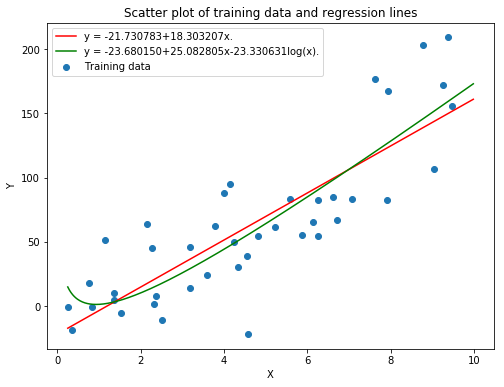

In [240]:
#(d)
plt.figure(figsize = (8,6))
plt.scatter(x_train, y_train, label = "Training data")
x_data = np.linspace(min(x_train),max(x_train)+0.5, 500)
lin_plot = intercept + coefficient * x_data
plt.plot(x_data, np.array(lin_plot).reshape(-1,1),'r', 
         label="y = %f+%fx." % (intercept,coefficient))
log_x_data = np.array([math.log(i) for i in x_data])
lin_log_plot = intercept_log+coefficient_log[0][0]*x_data+coefficient_log[0][1]*log_x_data
plt.plot(x_data, lin_log_plot,'g', label = "y = %f+%fx%flog(x)." % 
         (intercept_log,coefficient_log[0][0], coefficient_log[0][1]))
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter plot of training data and regression lines")
plt.legend()
plt.show()

In [241]:
#(e)
print("Model wihtout transformation:")
r2 = linreg.score(np.array(x_test).reshape(-1,1), np.array(y_test).reshape(-1,1))
print("R-sqaured based on test data is %f." % (r2))
predict_test = linreg.predict(np.array(x_test).reshape(-1,1))
mse = mean_squared_error(predict_test, np.array(y_test).reshape(-1,1))
print("Mean Square Error based on test data is %f." % (mse))

Model wihtout transformation:
R-sqaured based on test data is 0.555647.
Mean Square Error based on test data is 2023.312109.


In [242]:
x_test_log = [math.log(x) for x in x_test]
x_test_dataset = np.c_[np.array(x_test), np.array(x_test_log)]

print("Model with log transformation:")
r2_log = lin_reg_log.score(x_test_dataset, np.array(y_test).reshape(-1,1))
print("R-squared based on test data is %f." % (r2_log))
predict_log = lin_reg_log.predict(x_test_dataset)
mse_log = mean_squared_error(predict_log, np.array(y_test).reshape(-1,1))
print("Mean Sqaure Error based on test data is %f." % (mse_log))

Model with log transformation:
R-squared based on test data is 0.631850.
Mean Sqaure Error based on test data is 1676.328705.


(f) Model with log transformation predicts better than that without transformation on both training set and test set. The R-squared of transformed model is higher and its MSE is lower. On one hand, the model with log transformation has more coefficients, which leads to higher flexibility. On the other hand, from the plot below, we can see a non-linear pattern between x and y, espcially for test data. The log transformation takes into account this non-linear pattern. 

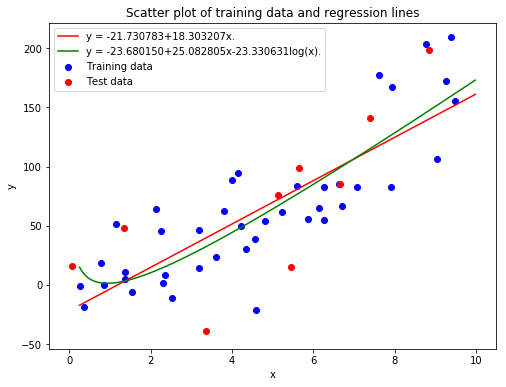

In [199]:
plt.figure(figsize = (8,6))
plt.scatter(x_train, y_train,c='b',label = 'Training data')
plt.scatter(x_test, y_test,c='r', label = 'Test data')
plt.plot(x_data, np.array(lin_plot).reshape(-1,1),'r', 
         label="y = %f+%fx." % (intercept,coefficient))
plt.plot(x_data, lin_log_plot,'g', label = "y = %f+%fx%flog(x)." % 
         (intercept_log,coefficient_log[0][0], coefficient_log[0][1]))
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter plot of training data and regression lines")
plt.legend()
plt.show()

(g) If the test dataset is significantly different from the training dataset, the predictive capability will drop significantly too. Our model is based on the assumption of similar distribution between training and test datasets. If the datasets are different, we might need to predict with extrapolation, which reduces the predictive capability of the model.